In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from imports import *

In [3]:
# prebuilt model classes
import importlib

from models import *
from data import * 
from env import *
from harmonize import *
from metrics import * 
from sim import *
from sim import multi_sim_run
from sim import plot

import time
import os

### Run simulations for a range of resolutions and random seeds 

#### Conn-Conn runs

In [74]:
resolutions = [1.00, 1.01, 1.02] # [1.0, 1.01, 1.02] p.arange(1.0, 1.1, 0.005) # 0.8 1.6
seeds = [0, 1, 2, 3, 4, 5, 6] # [0, 1, 2, 3, 4, 5, 6]
resolutions = [1.01] #, 1.01, 1.02] # [1.0, 1.01, 1.02] p.arange(1.0, 1.1, 0.005) # 0.8 1.6
seeds = [5] #, 1, 2, 3] #, 4, 5, 6] 

results = {}
for rv in resolutions:
    for seed in seeds:
        try:
            print(f"Running simulation with resolution {rv}")
            start_time = time.time()
            conn_xgb_community_noshared_sim_results = multi_sim_run.single_sim_run(
                'conn only',
                'community',
                'xgboost',
                use_gpu=True,
                use_shared_regions=False, 
                test_shared_regions=False,
                save_sim=True,
                resolution=rv,
                random_seed=seed,
                search_method='random',
            )
            end_time = time.time()
            print(f"Simulation took {end_time - start_time} seconds to execute...")
            
            results[rv] = conn_xgb_community_noshared_sim_results
        except Exception as e:
            print(e)
            continue


Running simulation with resolution 1.01
(114, 11053)
PCA value True
Number of components explaining 95% of the variance: 34

 Test fold num: 1
(8930, 190) (8930,) (342, 190) (342,)
2
3
Fitting 1 folds for each of 100 candidates, totalling 100 fits
[CV 1/1] END colsample_bytree=1, device=cuda, gamma=0, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=100, random_state=42, reg_alpha=0.01, reg_lambda=0.01, subsample=1, tree_method=gpu_hist, verbosity=0;, score=-0.036 total time=   0.1s
[CV 1/1] END colsample_bytree=0.8, device=cuda, gamma=0.1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=50, random_state=42, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, tree_method=gpu_hist, verbosity=0;, score=-0.050 total time=   0.1s
[CV 1/1] END colsample_bytree=0.5, device=cuda, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, random_state=42, reg_alpha=1, reg_lambda=0.1, subsample=1, tree_method=gpu_hist, verbosity=0;, score=-0.03

### TRACK CONFIG SIM RUNS FOR RESOLUTION=1.0 (h100 tests)
random search: 
- niter=100: 157 secs
- niter=100, njobs=4: 156 secs

n_iters=100, n_points=1, n_jobs=1, 'gpu_hist': 868 secs, 15 mins
n_iters=10, n_points=10, n_jobs=1, 'gpu_hist': 23 secs (_this might be what we want_)
n_iters=10, n_points=10, n_jobs=-1, 'gpu_hist': 40 secs (may be getting passed to cpu with n jobs)
n_iters=10, n_points=10, n_jobs=1, 'hist':  23 secs (hist seems to take the same at this level)
n_iters=10, n_points=1, n_jobs=1, 'gpu_hist': 33 secs

n_iters=50, n_points=1, n_jobs=1, 'gpu_hist': ~440 secs, 7 mins
n_iters=10, n_points=5, n_jobs=1, 'gpu_hist': 37 secs
n_iters=1, n_points=50, n_jobs=1, 'gpu_hist':  7 secs


- figure out if gpu_hist or hist is faster... (gpu_hist may be faster for gene expression but hist faster for connectome - size of dataset matters, need to test this)

#### Trans-Conn runs

In [76]:
resolutions = [1.02] # [1.0, 1.01, 1.02] p.arange(1.0, 1.1, 0.005) # 0.8 1.6
seeds = [1, 2, 3, 4, 5, 6]

results = {}
for rv in resolutions:
    for seed in seeds:
        try:
            print(f"Running simulation with resolution {rv}")
            start_time = time.time()
            conn_xgb_community_noshared_sim_results = multi_sim_run.single_sim_run(
                'trans only',
                'community',
                'xgboost',
                use_gpu=True,
                use_shared_regions=False, 
                test_shared_regions=False,
                save_sim=True,
                resolution=rv,
                random_seed=seed,
                search_method='random',
            )
            end_time = time.time()
            print(f"Simulation took {end_time - start_time} seconds to execute...")
            
            results[rv] = conn_xgb_community_noshared_sim_results
        except Exception as e:
            print(e)
            continue


Running simulation with resolution 1.02
(114, 11053)
PCA value True
Number of components explaining 95% of the variance: 34
Processing fold 0...
Processing fold 1...
Processing fold 2...
Processing fold 3...

 Test fold num: 1
(8930, 68) (8930,) (342, 68) (342,)
2
3
4
Processing fold 0...
Processing fold 1...
Processing fold 2...
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END colsample_bytree=1, device=cuda, gamma=0, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=100, random_state=42, reg_alpha=0.01, reg_lambda=0.01, subsample=1, tree_method=gpu_hist, verbosity=0;, score=-0.197 total time=   0.1s
[CV 2/3] END colsample_bytree=1, device=cuda, gamma=0, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=100, random_state=42, reg_alpha=0.01, reg_lambda=0.01, subsample=1, tree_method=gpu_hist, verbosity=0;, score=-0.036 total time=   0.1s
[CV 3/3] END colsample_bytree=1, device=cuda, gamma=0, learning_rate=0.3, max_depth=5, min_ch

### Trans+Conn-Conn runs

In [ ]:
resolutions = [1.0, 1.01, 1.02] # [1.0, 1.01, 1.02] p.arange(1.0, 1.1, 0.005) # 0.8 1.6
seeds = [1, 2, 3, 4, 5, 6]

results = {}
for rv in resolutions:
    for seed in seeds:
        try:
            print(f"Running simulation with resolution {rv}")
            start_time = time.time()
            conn_xgb_community_noshared_sim_results = multi_sim_run.single_sim_run(
                'trans plus conn',
                'community',
                'xgboost',
                use_gpu=True,
                use_shared_regions=False, 
                test_shared_regions=False,
                save_sim=True,
                resolution=rv,
                random_seed=seed,
                search_method='random',
            )
            end_time = time.time()
            print(f"Simulation took {end_time - start_time} seconds to execute...")
            
            results[rv] = conn_xgb_community_noshared_sim_results
        except Exception as e:
            print(e)
            continue


Running simulation with resolution 1.0
(114, 11053)
PCA value True
Number of components explaining 95% of the variance: 34
Processing fold 0...
Processing fold 1...
Processing fold 2...

 Test fold num: 1
(6320, 228) (6320,) (1122, 228) (1122,)
2
3
Processing fold 0...
Processing fold 1...
Fitting 1 folds for each of 100 candidates, totalling 100 fits
[CV 1/1] END colsample_bytree=1, device=cuda, gamma=0, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=100, random_state=42, reg_alpha=0.01, reg_lambda=0.01, subsample=1, tree_method=gpu_hist, verbosity=0;, score=-0.117 total time=   0.1s
[CV 1/1] END colsample_bytree=0.8, device=cuda, gamma=0.1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=50, random_state=42, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, tree_method=gpu_hist, verbosity=0;, score=-0.095 total time=   0.1s
[CV 1/1] END colsample_bytree=0.5, device=cuda, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, 

### Compare results

In [31]:
resolutions = [1.00, 1.005, 1.01, 1.02]
seeds = [0, 1, 2, 3, 4, 5, 6]


In [32]:
conn_loaded_results = {}

for r in resolutions:
    for s in seeds:
        try:
            dataset = f"single_sim_conn_community_xgboost{r}_{s}.pickle"
            print(dataset)
            conn_loaded_results[str(r)+'_'+str(s)] = multi_sim_run.open_pickled_results(dataset)
        except:
            continue

filtered_results = []
for r, v in conn_loaded_results.items():
    d = {"resolution": r, "pearson_corr": v[0][0]['test_metrics']['pearson_corr'], "mse": v[0][0]['test_metrics']['mse'], "r2": v[0][0]['test_metrics']['r2']}
    filtered_results.append(d)

conn_df = pd.DataFrame.from_dict(filtered_results)
conn_df

single_sim_conn_community_xgboost1.0_0.pickle
single_sim_conn_community_xgboost1.0_1.pickle
single_sim_conn_community_xgboost1.0_2.pickle
single_sim_conn_community_xgboost1.0_3.pickle
single_sim_conn_community_xgboost1.0_4.pickle
single_sim_conn_community_xgboost1.0_5.pickle
single_sim_conn_community_xgboost1.0_6.pickle
single_sim_conn_community_xgboost1.005_0.pickle
single_sim_conn_community_xgboost1.005_1.pickle
single_sim_conn_community_xgboost1.005_2.pickle
single_sim_conn_community_xgboost1.005_3.pickle
single_sim_conn_community_xgboost1.005_4.pickle
single_sim_conn_community_xgboost1.005_5.pickle
single_sim_conn_community_xgboost1.005_6.pickle
single_sim_conn_community_xgboost1.01_0.pickle
single_sim_conn_community_xgboost1.01_1.pickle
single_sim_conn_community_xgboost1.01_2.pickle
single_sim_conn_community_xgboost1.01_3.pickle
single_sim_conn_community_xgboost1.01_4.pickle
single_sim_conn_community_xgboost1.01_5.pickle
single_sim_conn_community_xgboost1.01_6.pickle
single_sim_co

resolution  pearson_corr       mse        r2
0       1.0_0      0.747326  0.096125 -0.544386
1       1.0_1      0.722763  0.062360 -0.395843
2       1.0_2      0.742952  0.089892 -0.433246
3       1.0_3      0.824104  0.106161 -0.430413
4       1.0_4      0.746466  0.091659 -0.472334
5       1.0_5      0.747447  0.049699 -0.086500
6       1.0_6      0.746466  0.091659 -0.472334
7     1.005_5      0.747447  0.049699 -0.086500
8      1.01_0      0.747326  0.096125 -0.544386
9      1.01_1      0.722763  0.062360 -0.395843
10     1.01_2      0.768637  0.082775 -0.330278
11     1.01_3      0.685879  0.050230 -0.242865
12     1.01_4      0.746466  0.091659 -0.472334
13     1.01_5      0.755516  0.085492 -0.371607
14     1.01_6      0.746466  0.091659 -0.472334
15     1.02_0      0.747326  0.096125 -0.544386
16     1.02_1      0.884072  0.040779 -0.022536
17     1.02_2      0.768637  0.082775 -0.330278
18     1.02_3      0.685879  0.050230 -0.242865
19     1.02_4      0.746466  0.091659 -0.472334
20     1.02_5      0.755516  0.085492 -0.371607
21     1.02_6      0.746466  0.091659 -0.472334

In [33]:
trans_loaded_results = {}

for r in resolutions:
    for s in seeds:
        try:
            dataset = f"single_sim_trans_community_xgboost{r}_{s}_PCA.pickle"
            print(dataset)
            trans_loaded_results[str(r)+'_'+str(s)] = multi_sim_run.open_pickled_results(dataset)
        except:
            continue

filtered_results = []
for r, v in trans_loaded_results.items():
    d = {"resolution": r, "pearson_corr": v[0][0]['test_metrics']['pearson_corr'], "mse": v[0][0]['test_metrics']['mse'], "r2": v[0][0]['test_metrics']['r2']}
    filtered_results.append(d)

trans_df = pd.DataFrame.from_dict(filtered_results)
trans_df

single_sim_trans_community_xgboost1.0_0_PCA.pickle
single_sim_trans_community_xgboost1.0_1_PCA.pickle
single_sim_trans_community_xgboost1.0_2_PCA.pickle
single_sim_trans_community_xgboost1.0_3_PCA.pickle
single_sim_trans_community_xgboost1.0_4_PCA.pickle
single_sim_trans_community_xgboost1.0_5_PCA.pickle
single_sim_trans_community_xgboost1.0_6_PCA.pickle
single_sim_trans_community_xgboost1.005_0_PCA.pickle
single_sim_trans_community_xgboost1.005_1_PCA.pickle
single_sim_trans_community_xgboost1.005_2_PCA.pickle
single_sim_trans_community_xgboost1.005_3_PCA.pickle
single_sim_trans_community_xgboost1.005_4_PCA.pickle
single_sim_trans_community_xgboost1.005_5_PCA.pickle
single_sim_trans_community_xgboost1.005_6_PCA.pickle
single_sim_trans_community_xgboost1.01_0_PCA.pickle
single_sim_trans_community_xgboost1.01_1_PCA.pickle
single_sim_trans_community_xgboost1.01_2_PCA.pickle
single_sim_trans_community_xgboost1.01_3_PCA.pickle
single_sim_trans_community_xgboost1.01_4_PCA.pickle
single_sim_t

resolution  pearson_corr       mse        r2
0      1.01_1      0.522580  0.072399 -1.232654
1      1.01_2      0.389159  0.197338 -2.193357
2      1.01_3      0.466892  0.063601 -1.360932
3      1.01_4      0.389159  0.197338 -2.193357
4      1.01_5      0.523165  0.187433 -2.037978
5      1.01_6      0.389159  0.197338 -2.193357
6      1.02_1      0.732343  0.048190 -1.240494
7      1.02_2      0.389159  0.197338 -2.193357
8      1.02_3      0.466892  0.063601 -1.360932
9      1.02_4      0.389159  0.197338 -2.193357
10     1.02_5      0.523165  0.187433 -2.037978
11     1.02_6      0.389159  0.197338 -2.193357

In [34]:
transplusconn_loaded_results = {}

for r in resolutions:
    for s in seeds:
        try:
            dataset = f"single_sim_transplusconn_community_xgboost{r}_{s}_PCA.pickle"
            print(dataset)
            transplusconn_loaded_results[str(r)+'_'+str(s)] = multi_sim_run.open_pickled_results(dataset)
        except:
            continue

filtered_results = []
for r, v in transplusconn_loaded_results.items():
    d = {"resolution": r, "pearson_corr": v[0][0]['test_metrics']['pearson_corr'], "mse": v[0][0]['test_metrics']['mse'], "r2": v[0][0]['test_metrics']['r2']}
    filtered_results.append(d)

transplusconn_df = pd.DataFrame.from_dict(filtered_results)
transplusconn_df

single_sim_transplusconn_community_xgboost1.0_0_PCA.pickle
single_sim_transplusconn_community_xgboost1.0_1_PCA.pickle
single_sim_transplusconn_community_xgboost1.0_2_PCA.pickle
single_sim_transplusconn_community_xgboost1.0_3_PCA.pickle
single_sim_transplusconn_community_xgboost1.0_4_PCA.pickle
single_sim_transplusconn_community_xgboost1.0_5_PCA.pickle
single_sim_transplusconn_community_xgboost1.0_6_PCA.pickle
single_sim_transplusconn_community_xgboost1.005_0_PCA.pickle
single_sim_transplusconn_community_xgboost1.005_1_PCA.pickle
single_sim_transplusconn_community_xgboost1.005_2_PCA.pickle
single_sim_transplusconn_community_xgboost1.005_3_PCA.pickle
single_sim_transplusconn_community_xgboost1.005_4_PCA.pickle
single_sim_transplusconn_community_xgboost1.005_5_PCA.pickle
single_sim_transplusconn_community_xgboost1.005_6_PCA.pickle
single_sim_transplusconn_community_xgboost1.01_0_PCA.pickle
single_sim_transplusconn_community_xgboost1.01_1_PCA.pickle
single_sim_transplusconn_community_xgboo

resolution  pearson_corr       mse        r2
0       1.0_1      0.720760  0.057215 -0.237690
1       1.0_2      0.766954  0.070034 -0.105827
2       1.0_3      0.793157  0.113804 -0.508166
3       1.0_4      0.766844  0.070155 -0.109606
4       1.0_5      0.305182  0.090587 -3.033836
5       1.0_6      0.766844  0.070155 -0.109606
6      1.01_1      0.720760  0.057215 -0.237690
7      1.01_2      0.766844  0.070155 -0.109606
8      1.01_3      0.723371  0.050190 -0.262288
9      1.01_4      0.766844  0.070155 -0.109606
10     1.01_5      0.735225  0.090479 -0.439695
11     1.01_6      0.766844  0.070155 -0.109606
12     1.02_1      0.872272  0.033557 -0.067478
13     1.02_2      0.766844  0.070155 -0.109606
14     1.02_3      0.723371  0.050190 -0.262288
15     1.02_4      0.766844  0.070155 -0.109606
16     1.02_5      0.735225  0.090479 -0.439695
17     1.02_6      0.766844  0.070155 -0.109606

In [35]:
trans_df

resolution  pearson_corr       mse        r2
0      1.01_1      0.522580  0.072399 -1.232654
1      1.01_2      0.389159  0.197338 -2.193357
2      1.01_3      0.466892  0.063601 -1.360932
3      1.01_4      0.389159  0.197338 -2.193357
4      1.01_5      0.523165  0.187433 -2.037978
5      1.01_6      0.389159  0.197338 -2.193357
6      1.02_1      0.732343  0.048190 -1.240494
7      1.02_2      0.389159  0.197338 -2.193357
8      1.02_3      0.466892  0.063601 -1.360932
9      1.02_4      0.389159  0.197338 -2.193357
10     1.02_5      0.523165  0.187433 -2.037978
11     1.02_6      0.389159  0.197338 -2.193357

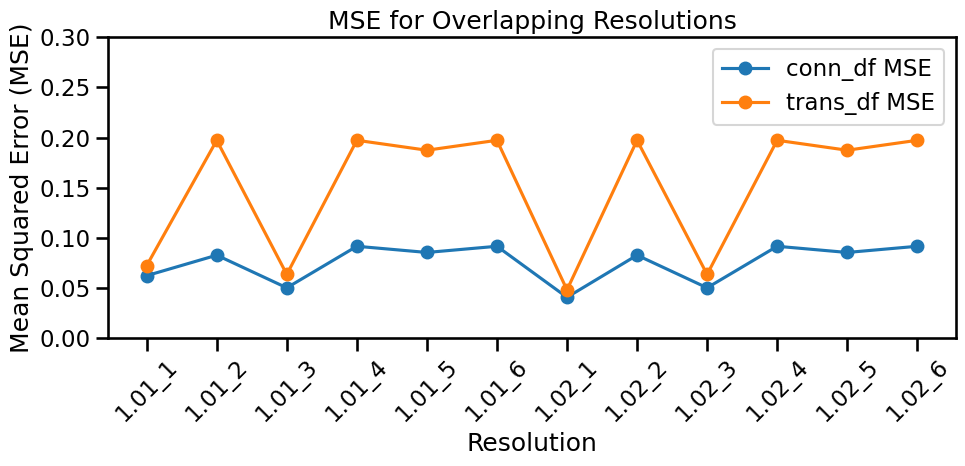

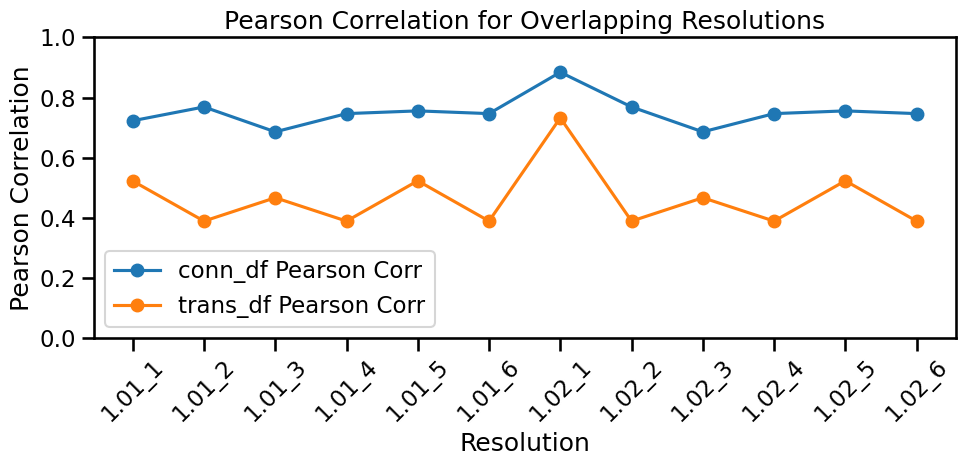

In [26]:

# Merge on 'resolution' to find overlapping resolution keys
merged_df = pd.merge(conn_df, trans_df, on='resolution', suffixes=('_conn', '_transPCA'))

# Plot 1: Mean Squared Error (MSE) for overlapping resolution values
plt.figure(figsize=(10, 5))
plt.plot(merged_df['resolution'], merged_df['mse_conn'], label='conn_df MSE', marker='o')
plt.plot(merged_df['resolution'], merged_df['mse_trans'], label='trans_df MSE', marker='o')
plt.xlabel('Resolution')
plt.ylabel('Mean Squared Error (MSE)')
plt.ylim(0, 0.3)
plt.title('MSE for Overlapping Resolutions')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plot 2: Pearson Correlation for overlapping resolution values
plt.figure(figsize=(10, 5))
plt.plot(merged_df['resolution'], merged_df['pearson_corr_conn'], label='conn_df Pearson Corr', marker='o')
plt.plot(merged_df['resolution'], merged_df['pearson_corr_trans'], label='trans_df Pearson Corr', marker='o')
plt.xlabel('Resolution')
plt.ylabel('Pearson Correlation')
plt.ylim(0, 1.0)
plt.title('Pearson Correlation for Overlapping Resolutions')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [36]:
# Merge on 'resolution' to find overlapping resolution keys
# Merge on 'resolution' to find overlapping resolution keys
merged_df = pd.merge(merged_df, transplusconn_df, on='resolution', suffixes=('', '_transplusconnPCA'))
merged_df


resolution  pearson_corr_conn  mse_conn   r2_conn  pearson_corr_trans  \
0      1.01_1           0.722763  0.062360 -0.395843            0.522580   
1      1.01_2           0.768637  0.082775 -0.330278            0.389159   
2      1.01_3           0.685879  0.050230 -0.242865            0.466892   
3      1.01_4           0.746466  0.091659 -0.472334            0.389159   
4      1.01_5           0.755516  0.085492 -0.371607            0.523165   
5      1.01_6           0.746466  0.091659 -0.472334            0.389159   
6      1.02_1           0.884072  0.040779 -0.022536            0.732343   
7      1.02_2           0.768637  0.082775 -0.330278            0.389159   
8      1.02_3           0.685879  0.050230 -0.242865            0.466892   
9      1.02_4           0.746466  0.091659 -0.472334            0.389159   
10     1.02_5           0.755516  0.085492 -0.371607            0.523165   
11     1.02_6           0.746466  0.091659 -0.472334            0.389159   

    mse_trans  r2_trans  pearson_corr       mse        r2  \
0    0.072399 -1.232654      0.720760  0.057215 -0.237690   
1    0.197338 -2.193357      0.766844  0.070155 -0.109606   
2    0.063601 -1.360932      0.723371  0.050190 -0.262288   
3    0.197338 -2.193357      0.766844  0.070155 -0.109606   
4    0.187433 -2.037978      0.735225  0.090479 -0.439695   
5    0.197338 -2.193357      0.766844  0.070155 -0.109606   
6    0.048190 -1.240494      0.872272  0.033557 -0.067478   
7    0.197338 -2.193357      0.766844  0.070155 -0.109606   
8    0.063601 -1.360932      0.723371  0.050190 -0.262288   
9    0.197338 -2.193357      0.766844  0.070155 -0.109606   
10   0.187433 -2.037978      0.735225  0.090479 -0.439695   
11   0.197338 -2.193357      0.766844  0.070155 -0.109606   

    pearson_corr_transplusconn  mse_transplusconn  r2_transplusconn  \
0                     0.720760           0.057215         -0.237690   
1                     0.766844           0.070155         -0.109606   
2                     0.723371           0.050190         -0.262288   
3                     0.766844           0.070155         -0.109606   
4                     0.735225           0.090479         -0.439695   
5                     0.766844           0.070155         -0.109606   
6                     0.872272           0.033557         -0.067478   
7                     0.766844           0.070155         -0.109606   
8                     0.723371           0.050190         -0.262288   
9                     0.766844           0.070155         -0.109606   
10                    0.735225           0.090479         -0.439695   
11                    0.766844           0.070155         -0.109606   

    pearson_corr_transplusconnPCA  mse_transplusconnPCA  r2_transplusconnPCA  
0                        0.720760              0.057215            -0.237690  
1                        0.766844              0.070155            -0.109606  
2                        0.723371              0.050190            -0.262288  
3                        0.766844              0.070155            -0.109606  
4                        0.735225              0.090479            -0.439695  
5                        0.766844              0.070155            -0.109606  
6                        0.872272              0.033557            -0.067478  
7                        0.766844              0.070155            -0.109606  
8                        0.723371              0.050190            -0.262288  
9                        0.766844              0.070155            -0.109606  
10                       0.735225              0.090479            -0.439695  
11                       0.766844              0.070155            -0.109606

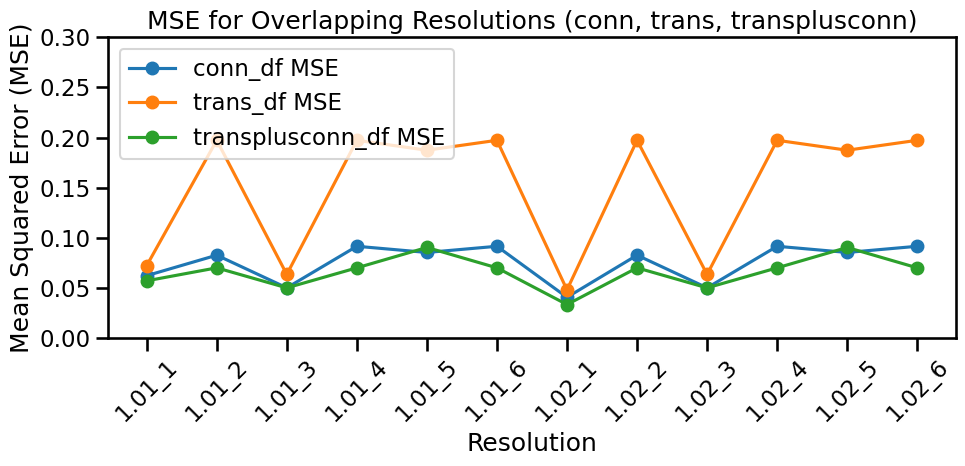

In [37]:
plt.figure(figsize=(10, 5))
plt.plot(merged_df['resolution'], merged_df['mse_conn'], label='conn_df MSE', marker='o')
plt.plot(merged_df['resolution'], merged_df['mse_trans'], label='trans_df MSE', marker='o')
plt.plot(merged_df['resolution'], merged_df['mse_transplusconn'], label='transplusconn_df MSE', marker='o')
plt.xlabel('Resolution')
plt.ylabel('Mean Squared Error (MSE)')
plt.ylim(0, 0.3)
plt.title('MSE for Overlapping Resolutions (conn, trans, transplusconn)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


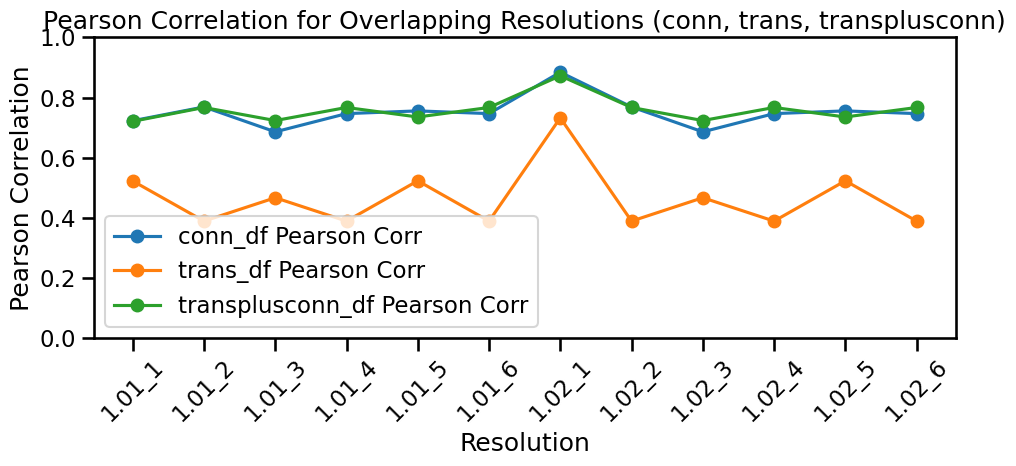

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(merged_df['resolution'], merged_df['pearson_corr_conn'], label='conn_df Pearson Corr', marker='o')
plt.plot(merged_df['resolution'], merged_df['pearson_corr_trans'], label='trans_df Pearson Corr', marker='o')
plt.plot(merged_df['resolution'], merged_df['pearson_corr_transplusconn'], label='transplusconn_df Pearson Corr', marker='o')
plt.xlabel('Resolution')
plt.ylabel('Pearson Correlation')
plt.ylim(0, 1.0)
plt.title('Pearson Correlation for Overlapping Resolutions (conn, trans, transplusconn)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


### Visualize specific runs

CONN


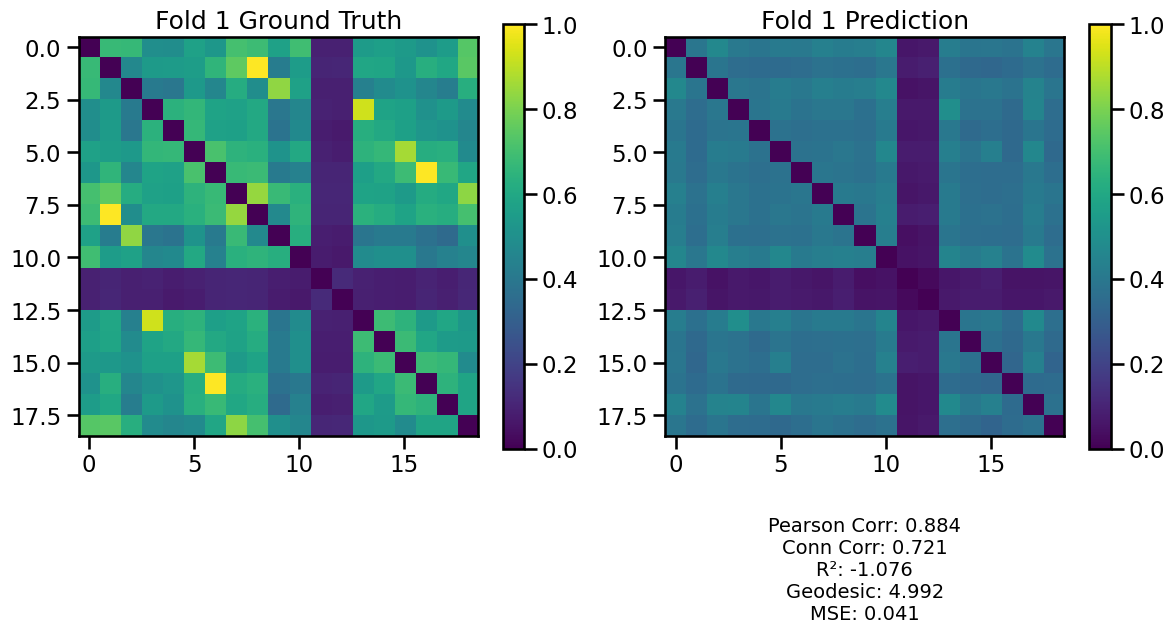

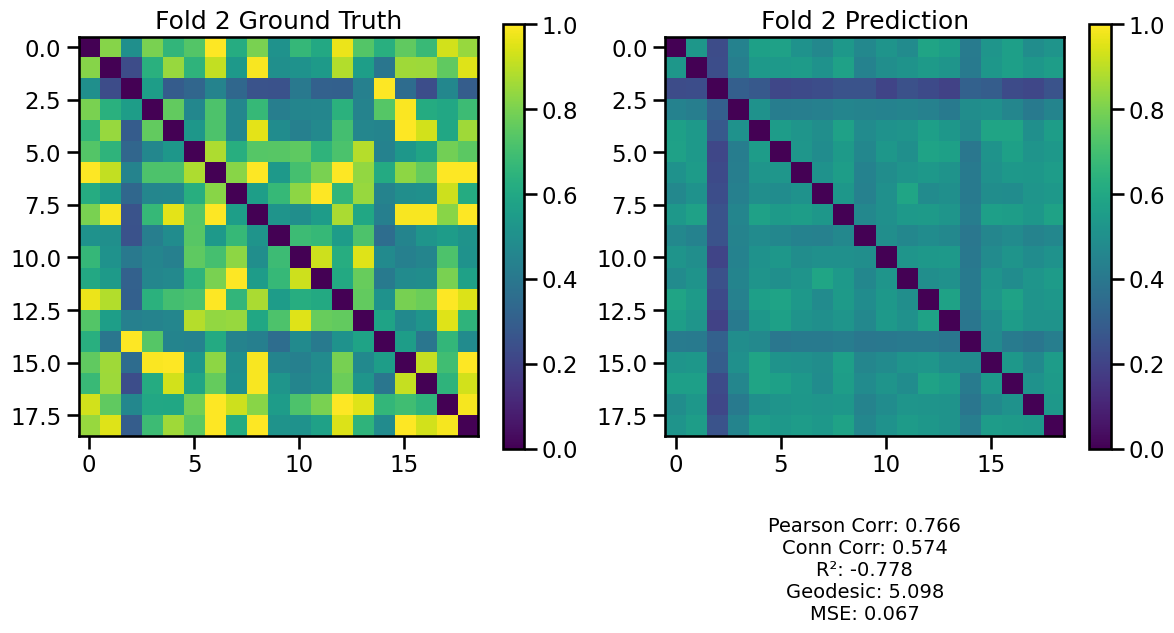

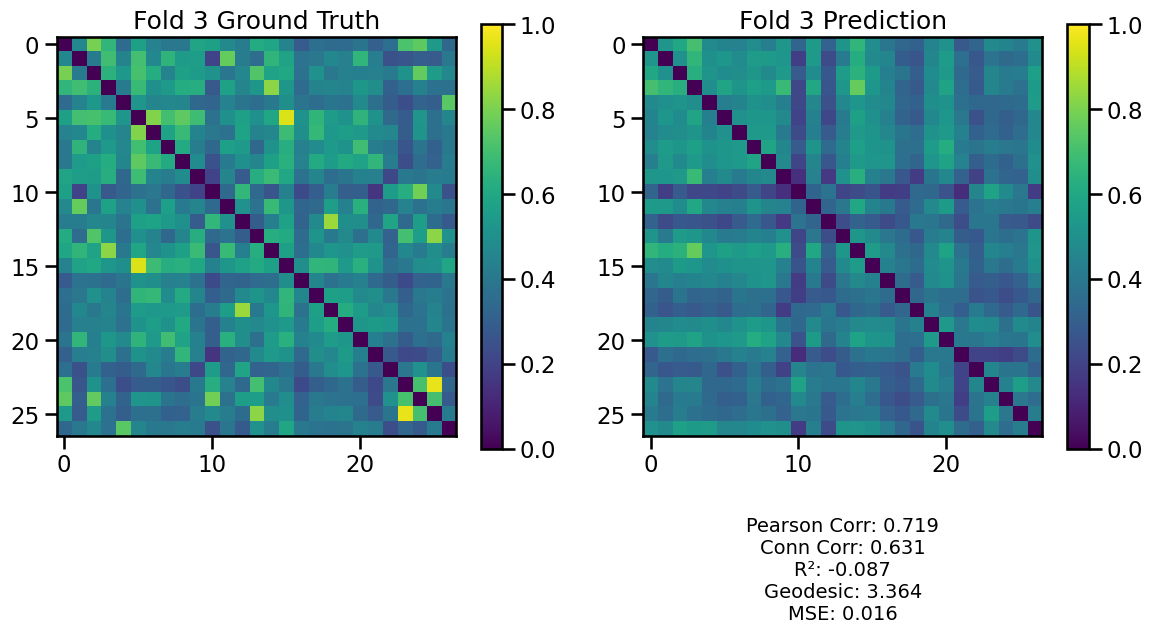

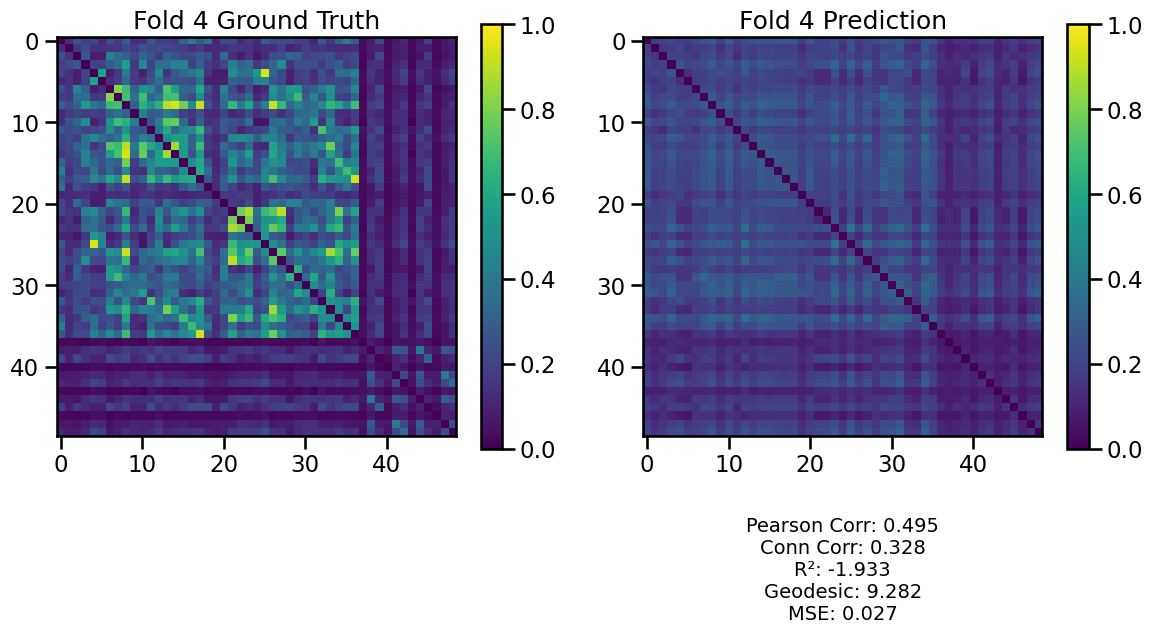

TRANS


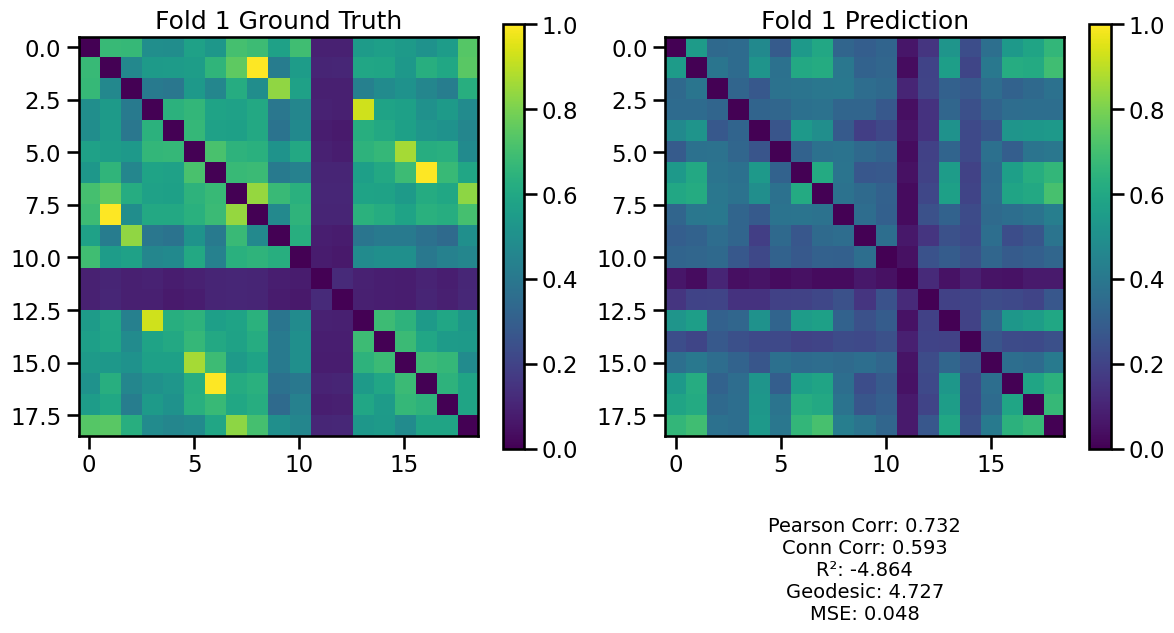

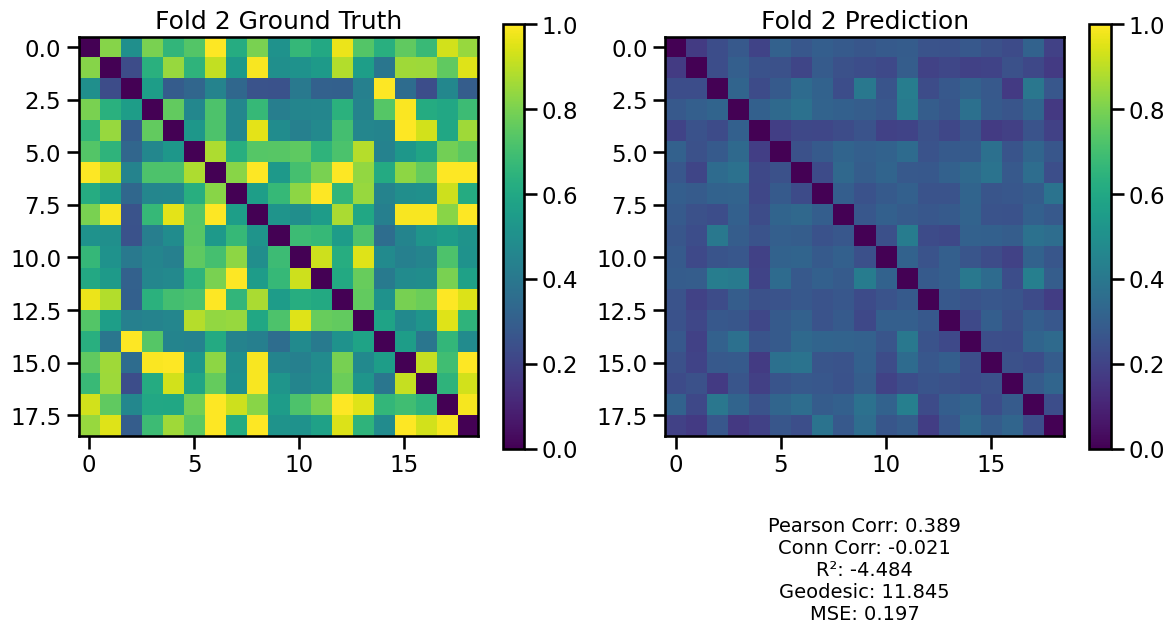

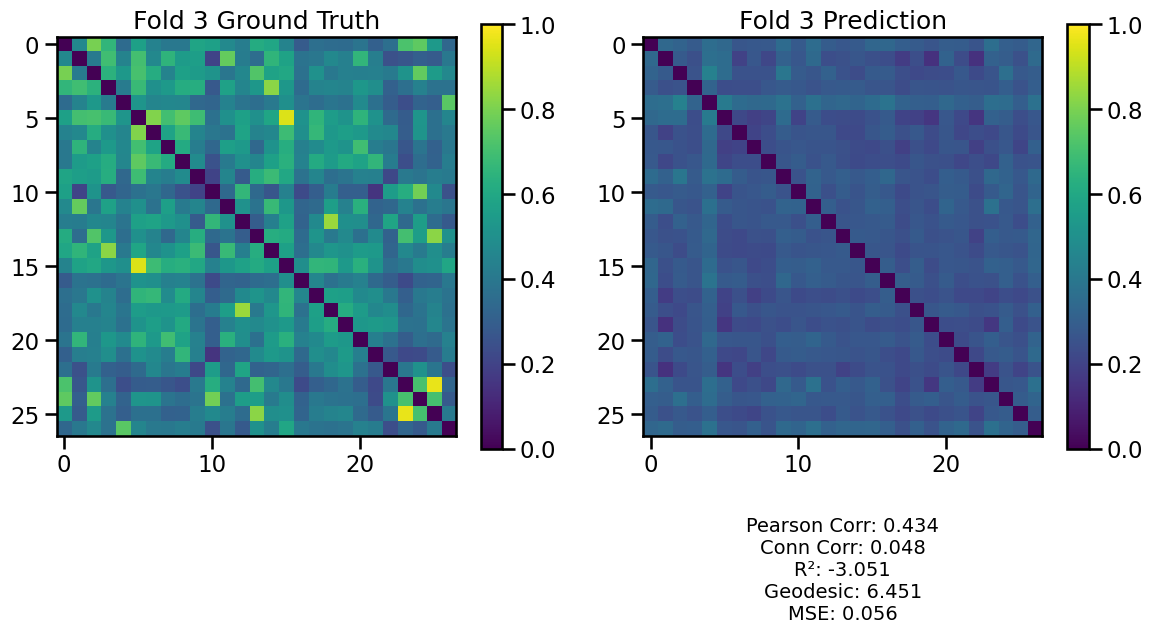

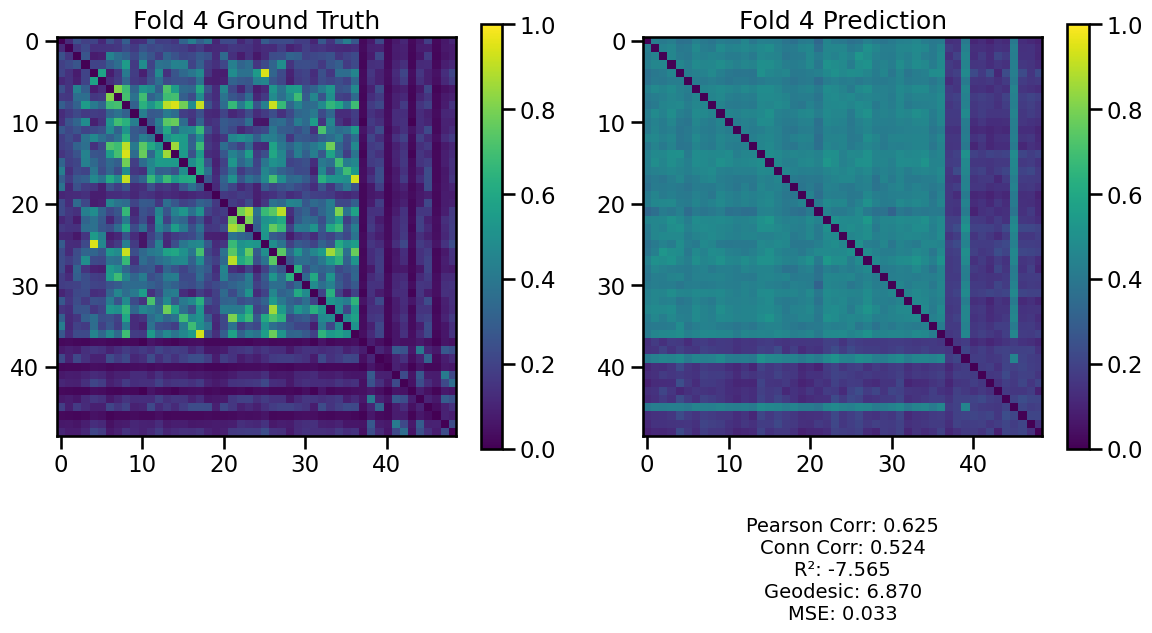

TRANSPLUS


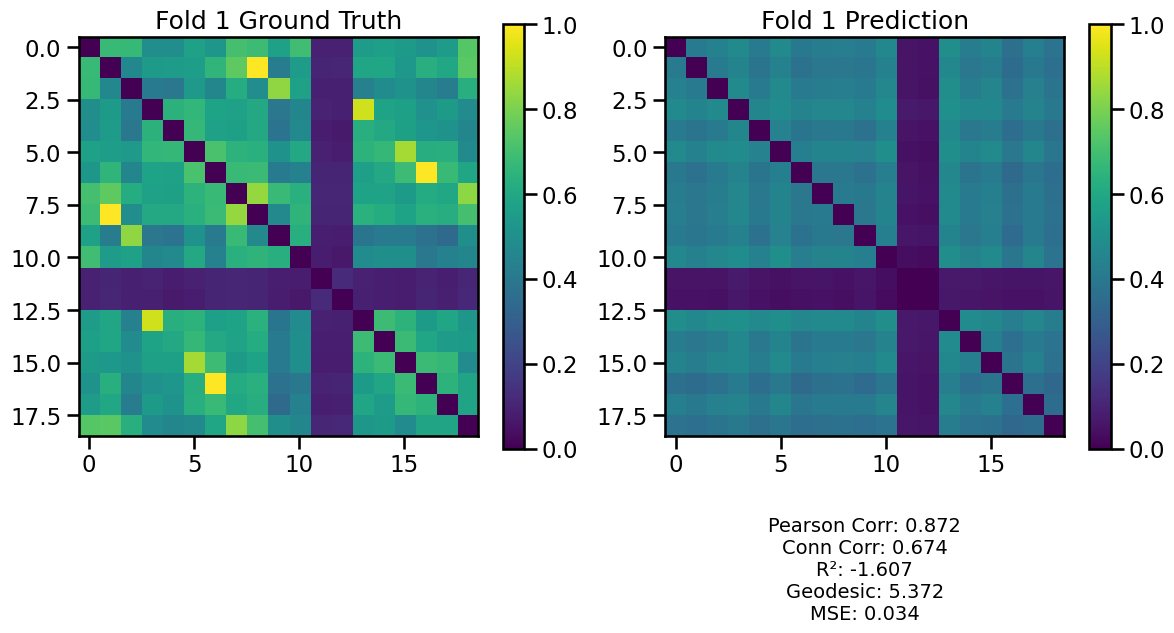

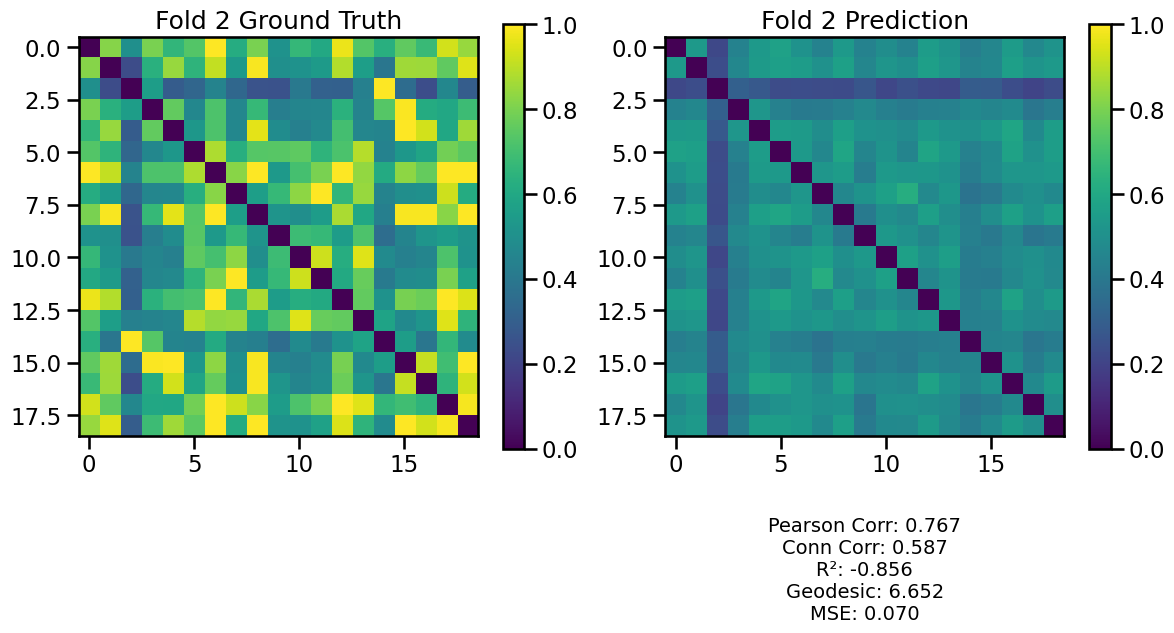

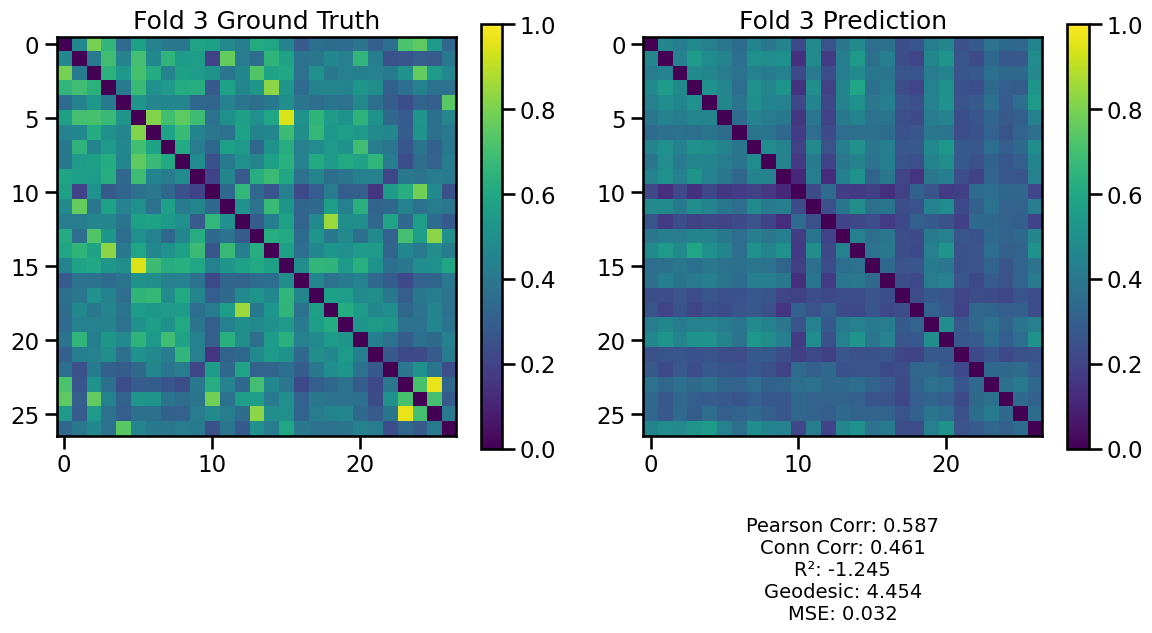

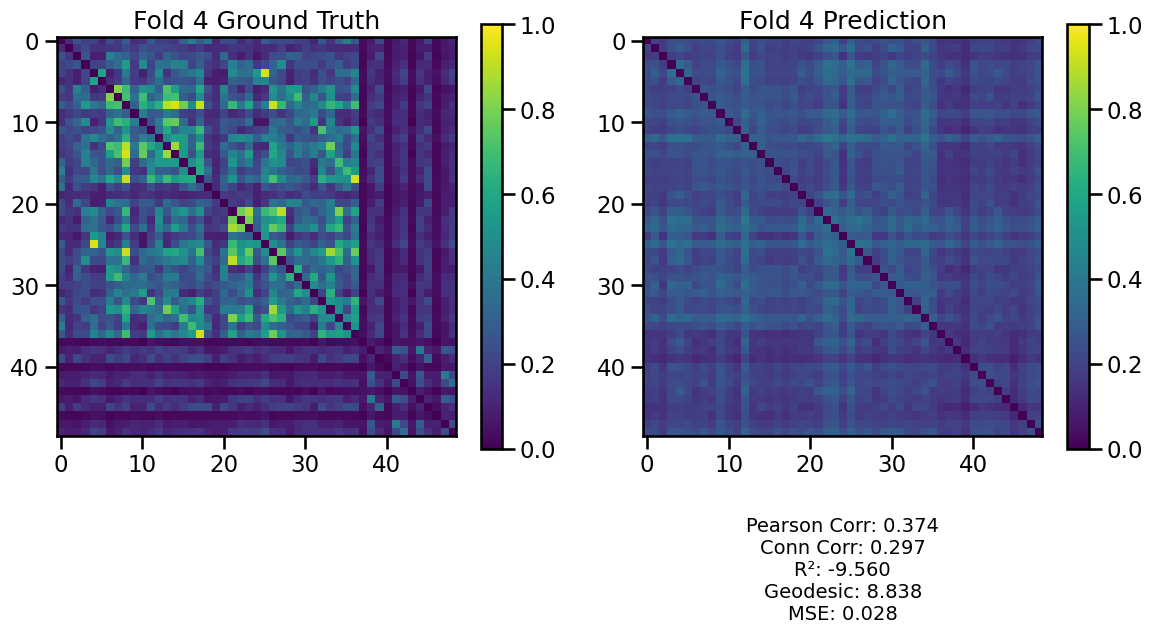

In [40]:
split = '1.02_1'
print('CONN')
plot.plot_single_model_predictions_with_metrics(conn_loaded_results[split])
print('TRANS')
plot.plot_single_model_predictions_with_metrics(trans_loaded_results[split])
print('TRANSPLUS')
plot.plot_single_model_predictions_with_metrics(transplusconn_loaded_results[split])

CONN


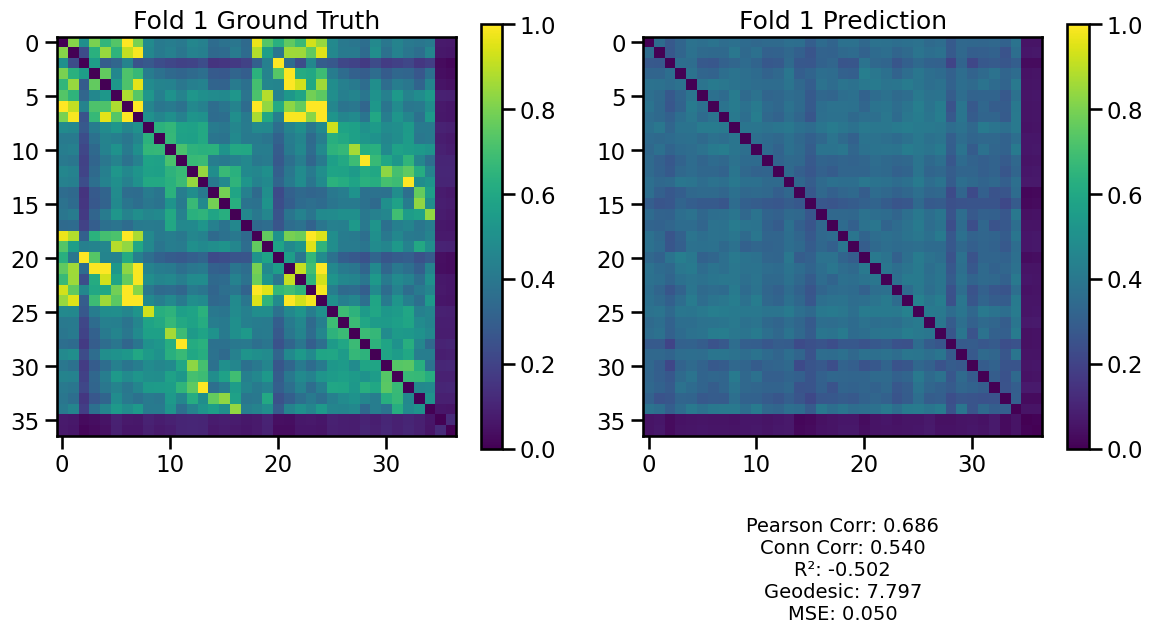

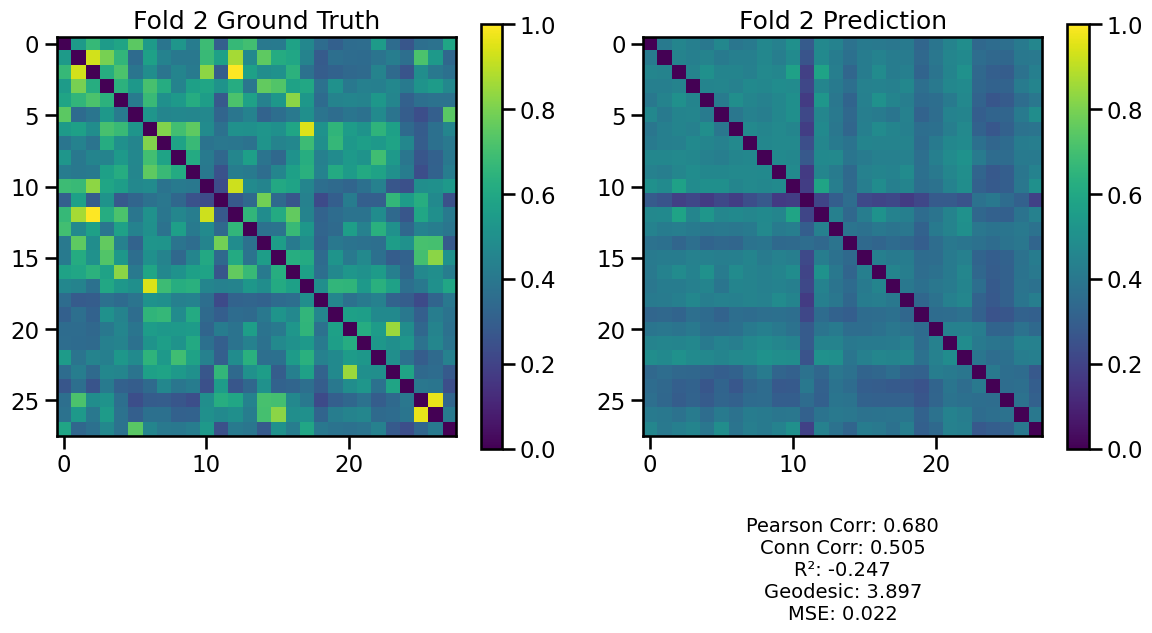

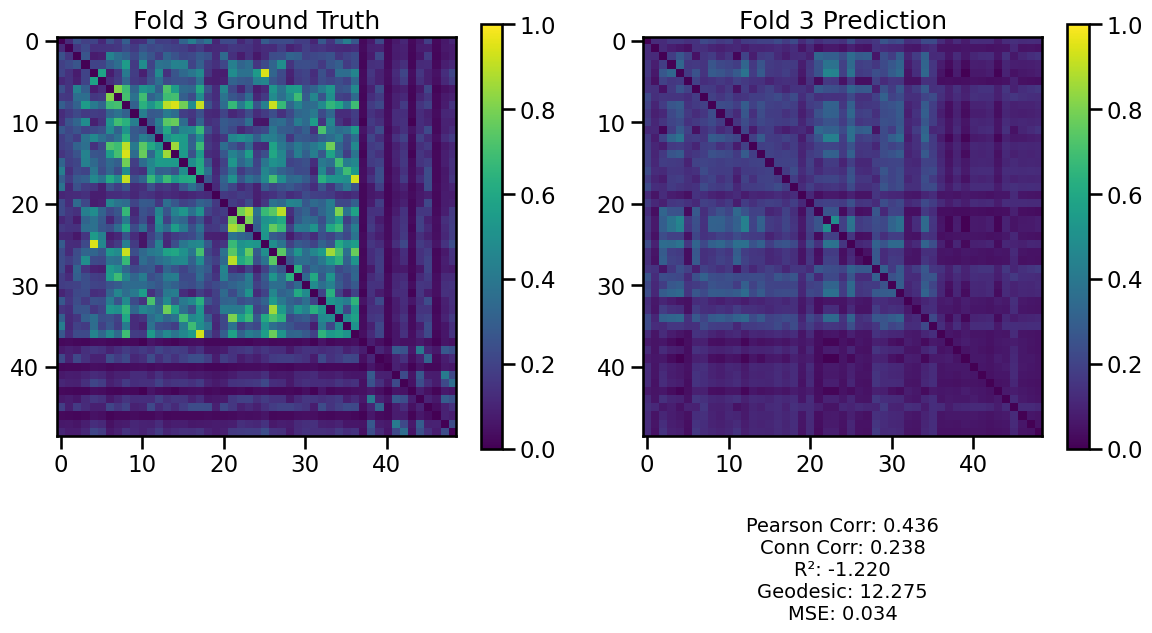

TRANS


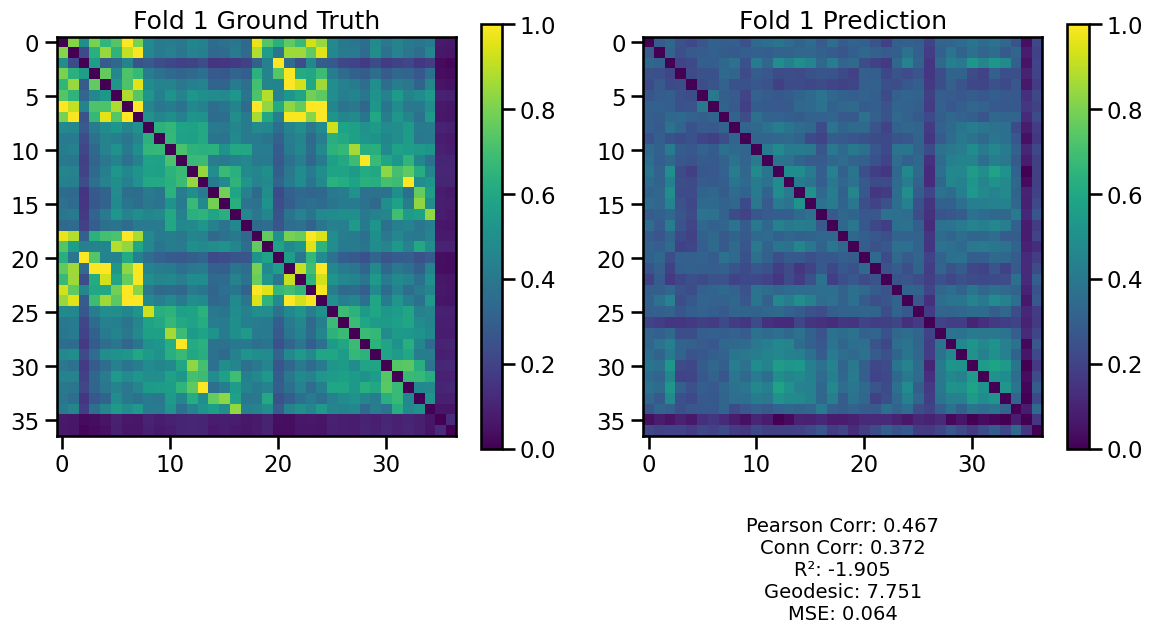

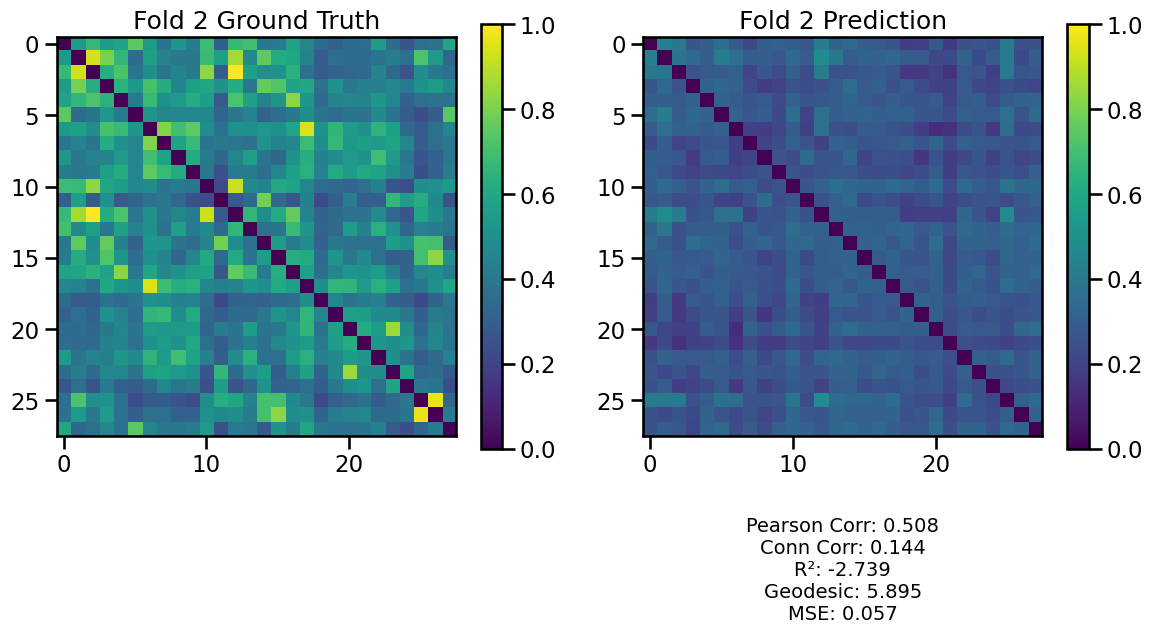

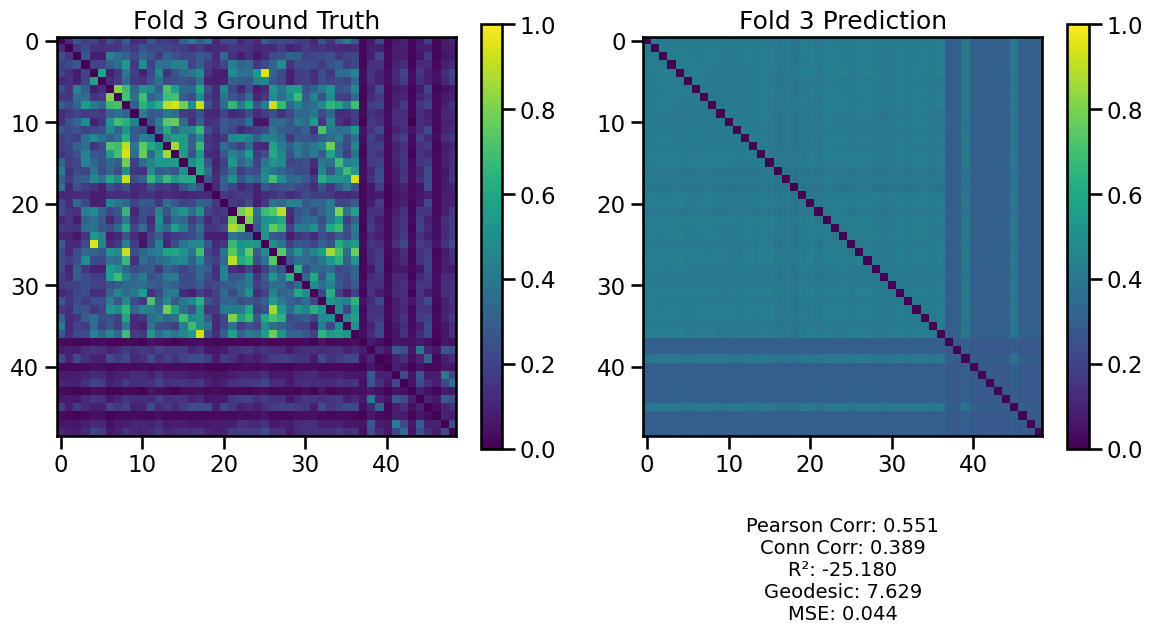

In [39]:
split = '1.02_3'
print('CONN')
plot.plot_single_model_predictions_with_metrics(conn_loaded_results[split])
print('TRANS')
plot.plot_single_model_predictions_with_metrics(trans_loaded_results[split])